## Anime Recommender - Data Preprocessing and recommender development

This is an updated version of the Anime Recommender project. This version uses an new an updated version of the dataset.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
%matplotlib inline
import re

### The dataset
See the webscrape script in the raw_data folder

In [2]:
anime_db = pd.read_csv('../data/MAL.csv')

In [3]:
anime_db.head()

,Unnamed: 0,name,english_name,type,episodes,members,score_members,rating,genre,dates,url
0,0,Captain Tsubasa: Asu ni Mukatte Hashire!,NaN,Movie,1.0,3655.0,NaN,6.72,"['Action', 'Sports', 'Shounen']",Mar 1986 - Mar 1986,https://myanimelist.net/anime/2120/Captain_Tsu...
1,1,Dragon Ball Z Movie 02: Kono Yo de Ichiban Tsu...,Dragon Ball Z: The World's Strongest,Movie,1.0,81251.0,NaN,6.70,"['Action', 'Adventure', 'Comedy', 'Fantasy', '...",Mar 1990 - Mar 1990,https://myanimelist.net/anime/895/Dragon_Ball_...
2,2,Eureka Seven AO: One More Time - Lord Don't Sl...,NaN,ONA,5.0,5726.0,NaN,6.73,"['Action', 'Sci-Fi', 'Adventure', 'Drama', 'Me...",Jan 2017 - Mar 2017,https://myanimelist.net/anime/34776/Eureka_Sev...
3,3,Fight Ippatsu! Juuden-chan!!,Juden Chan Recharged,TV,12.0,27393.0,NaN,6.71,"['Ecchi', 'Comedy', 'Sci-Fi', 'Shounen']",Jun 2009 - Sep 2009,https://myanimelist.net/anime/5973/Fight_Ippat...
4,4,God Eater Prologue,NaN,Special,1.0,29387.0,NaN,6.70,"['Action', 'Fantasy', 'Military', 'Sci-Fi']",Sep 2009 - Sep 2009,https://myanimelist.net/anime/10470/God_Eater_...


In [4]:
anime_db.tail()

,Unnamed: 0,name,english_name,type,episodes,members,score_members,rating,genre,dates,url
16645,45,Aoi Sekai no Chuushin de,World War Blue,Special,3.0,39823.0,NaN,5.84,"['Action', 'Adventure', 'Ecchi', 'Fantasy', 'P...",Oct 2012 - Apr 2013,https://myanimelist.net/anime/15133/Aoi_Sekai_...
16646,46,Big Order,NaN,OVA,1.0,30458.0,NaN,5.85,"['Action', 'Super Power', 'Shounen']",Oct 2015 - Oct 2015,https://myanimelist.net/anime/30137/Big_Order
16647,47,"Boku no Imouto wa ""Osaka Okan"": Uchi no Oniich...",NaN,Special,1.0,3272.0,NaN,5.85,['Comedy'],Apr 2013 - Apr 2013,https://myanimelist.net/anime/18419/Boku_no_Im...
16648,48,Daitan Futeki ni Koi Shitai,NaN,Music,1.0,207.0,NaN,5.85,['Music'],Nov 2018 - Nov 2018,https://myanimelist.net/anime/38487/Daitan_Fut...
16649,49,Dededen,NaN,Special,5.0,362.0,NaN,5.84,['Slice of Life'],Feb 2015 - Dec 2015,https://myanimelist.net/anime/30289/Dededen


In [5]:
anime_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     16650 non-null  int64  
 1   name           16650 non-null  object 
 2   english_name   5166 non-null   object 
 3   type           16650 non-null  object 
 4   episodes       16167 non-null  float64
 5   members        16650 non-null  float64
 6   score_members  0 non-null      float64
 7   rating         11584 non-null  float64
 8   genre          16650 non-null  object 
 9   dates          16650 non-null  object 
 10  url            16650 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.4+ MB


In [6]:
anime_db = anime_db.drop(["Unnamed: 0"], axis=1)

In [7]:
anime_db.tail()

,name,english_name,type,episodes,members,score_members,rating,genre,dates,url
16645,Aoi Sekai no Chuushin de,World War Blue,Special,3.0,39823.0,NaN,5.84,"['Action', 'Adventure', 'Ecchi', 'Fantasy', 'P...",Oct 2012 - Apr 2013,https://myanimelist.net/anime/15133/Aoi_Sekai_...
16646,Big Order,NaN,OVA,1.0,30458.0,NaN,5.85,"['Action', 'Super Power', 'Shounen']",Oct 2015 - Oct 2015,https://myanimelist.net/anime/30137/Big_Order
16647,"Boku no Imouto wa ""Osaka Okan"": Uchi no Oniich...",NaN,Special,1.0,3272.0,NaN,5.85,['Comedy'],Apr 2013 - Apr 2013,https://myanimelist.net/anime/18419/Boku_no_Im...
16648,Daitan Futeki ni Koi Shitai,NaN,Music,1.0,207.0,NaN,5.85,['Music'],Nov 2018 - Nov 2018,https://myanimelist.net/anime/38487/Daitan_Fut...
16649,Dededen,NaN,Special,5.0,362.0,NaN,5.84,['Slice of Life'],Feb 2015 - Dec 2015,https://myanimelist.net/anime/30289/Dededen


### Missing data

Check for missing data

In [8]:
#check missing values
anime_db.isnull().sum().sort_values(ascending=False)

score_members    16650
english_name     11484
rating            5066
episodes           483
url                  0
dates                0
genre                0
members              0
type                 0
name                 0
dtype: int64

A couple missing data (identified as NA. Note there could be missing data masked as something else):

- 16650 entries are missing, name, and genre 
- 483 are missing the number of episodes, 
- 11484 missing an English name
- 5066 are missing  ratings

We will drip the score_members column

Hmm we need to do a bit more digging to see if there are missing data

In [9]:
anime_db = anime_db.drop(["score_members"], axis=1)

In [10]:
anime_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16650 non-null  object 
 1   english_name  5166 non-null   object 
 2   type          16650 non-null  object 
 3   episodes      16167 non-null  float64
 4   members       16650 non-null  float64
 5   rating        11584 non-null  float64
 6   genre         16650 non-null  object 
 7   dates         16650 non-null  object 
 8   url           16650 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.1+ MB


In [11]:
anime_db.describe()

,episodes,members,rating
count,16167.000000,1.665000e+04,11584.000000
mean,11.672667,2.986958e+04,6.559012
std,48.493555,1.033044e+05,0.878491
min,1.000000,1.900000e+01,1.890000
25%,1.000000,3.070000e+02,6.000000
50%,2.000000,1.905000e+03,6.580000
75%,12.000000,1.228650e+04,7.180000
max,3057.000000,2.074444e+06,9.230000


let's have a look at the members vs ratings

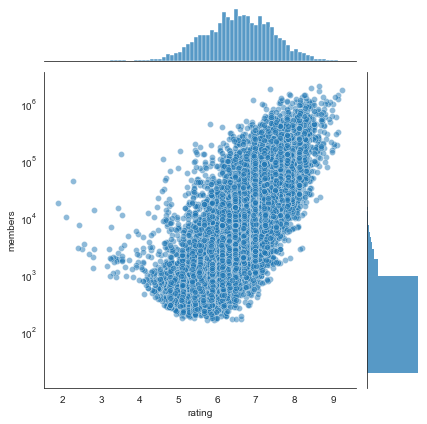

In [12]:
sns.jointplot(x='rating',y='members',data=anime_db,alpha=0.5)
plt.yscale('log')

the ratings seem to be linearly dependent on the (log) number of members. Seems logical: the more popular an anime is, the more members will add it to thieir list, and thus would score. Thus we can add missing ratings, based on the number of members. let's derive a linear model.

#### Linear model of members and ratings

 Let's create two datasets: 
 1. with ratings
 2. without ratings

In [13]:
without_rating = anime_db[anime_db["rating"].isnull()]
without_rating = without_rating.reset_index(drop=True)
without_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5066 entries, 0 to 5065
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5066 non-null   object 
 1   english_name  870 non-null    object 
 2   type          5066 non-null   object 
 3   episodes      4696 non-null   float64
 4   members       5066 non-null   float64
 5   rating        0 non-null      float64
 6   genre         5066 non-null   object 
 7   dates         5066 non-null   object 
 8   url           5066 non-null   object 
dtypes: float64(3), object(6)
memory usage: 356.3+ KB


In [14]:
with_rating = anime_db.dropna(subset=['rating'])
with_rating = with_rating.reset_index(drop=True)
with_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11584 entries, 0 to 11583
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          11584 non-null  object 
 1   english_name  4296 non-null   object 
 2   type          11584 non-null  object 
 3   episodes      11471 non-null  float64
 4   members       11584 non-null  float64
 5   rating        11584 non-null  float64
 6   genre         11584 non-null  object 
 7   dates         11584 non-null  object 
 8   url           11584 non-null  object 
dtypes: float64(3), object(6)
memory usage: 814.6+ KB


In [15]:
with_rating['members'].values.reshape(-1, 1)

array([[ 3655.],
       [81251.],
       [ 5726.],
       ...,
       [ 3272.],
       [  207.],
       [  362.]])

In [16]:
# now create a linear model using the with_ratings data

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(np.log10(with_rating['members'].values.reshape(-1, 1)),with_rating['rating'])

LinearRegression()

Before using the model to add a ratings, there is an issue with the model that should be addressed. This is thaat the model assumes a linear relation to below the minimum membership in the with_ratings dolumn. This may npt be true, but for our purpose I am assuming that it is. Notably thereare a few entires without a single member, and thus the log of that would throw an error. Thus we would have to repalce 0 with 1

In [17]:
without_rating['members_copy'] = without_rating['members']

In [18]:
without_rating['members_copy'].replace([0],[1],inplace=True)

In [19]:
without_rating['rating'] = lm.predict(np.log10(without_rating['members_copy'].values.reshape(-1,1)))
without_rating.describe()

,episodes,members,rating,members_copy
count,4696.000000,5066.000000,5066.000000,5066.000000
mean,12.685690,1076.560995,5.461086,1076.560995
std,65.245779,7738.022040,0.343669,7738.022040
min,1.000000,19.000000,4.674592,19.000000
25%,1.000000,120.000000,5.268338,120.000000
50%,1.000000,187.000000,5.411251,187.000000
75%,8.000000,300.000000,5.563524,300.000000
max,3057.000000,217776.000000,7.685692,217776.000000


In [20]:
without_rating = without_rating.drop("members_copy",axis=1)

In [21]:
without_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5066 entries, 0 to 5065
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5066 non-null   object 
 1   english_name  870 non-null    object 
 2   type          5066 non-null   object 
 3   episodes      4696 non-null   float64
 4   members       5066 non-null   float64
 5   rating        5066 non-null   float64
 6   genre         5066 non-null   object 
 7   dates         5066 non-null   object 
 8   url           5066 non-null   object 
dtypes: float64(3), object(6)
memory usage: 356.3+ KB


In [22]:
# for future reference I will add a new parameter that indicates if the ratings were modelled

without_rating['rating_type'] = "modelled"
with_rating['rating_type'] = "MAL"
# now append


In [23]:
with_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11584 entries, 0 to 11583
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          11584 non-null  object 
 1   english_name  4296 non-null   object 
 2   type          11584 non-null  object 
 3   episodes      11471 non-null  float64
 4   members       11584 non-null  float64
 5   rating        11584 non-null  float64
 6   genre         11584 non-null  object 
 7   dates         11584 non-null  object 
 8   url           11584 non-null  object 
 9   rating_type   11584 non-null  object 
dtypes: float64(3), object(7)
memory usage: 905.1+ KB


In [24]:
without_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5066 entries, 0 to 5065
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5066 non-null   object 
 1   english_name  870 non-null    object 
 2   type          5066 non-null   object 
 3   episodes      4696 non-null   float64
 4   members       5066 non-null   float64
 5   rating        5066 non-null   float64
 6   genre         5066 non-null   object 
 7   dates         5066 non-null   object 
 8   url           5066 non-null   object 
 9   rating_type   5066 non-null   object 
dtypes: float64(3), object(7)
memory usage: 395.9+ KB


In [25]:
anime_db = without_rating.append(with_rating)
anime_db = anime_db.reset_index(drop=True)
anime_db.info()
#anime_db.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16650 non-null  object 
 1   english_name  5166 non-null   object 
 2   type          16650 non-null  object 
 3   episodes      16167 non-null  float64
 4   members       16650 non-null  float64
 5   rating        16650 non-null  float64
 6   genre         16650 non-null  object 
 7   dates         16650 non-null  object 
 8   url           16650 non-null  object 
 9   rating_type   16650 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.3+ MB


In [26]:
anime_db.head()

,name,english_name,type,episodes,members,rating,genre,dates,url,rating_type
0,It's Marey O'Clock Now!,NaN,Movie,1.0,56.0,5.022812,['Dementia'],Oct 2018 - Oct 2018,https://myanimelist.net/anime/41489/Its_Marey_...,modelled
1,It's Show Time!,NaN,Music,1.0,135.0,5.306282,['Music'],Feb 2019 - Feb 2019,https://myanimelist.net/anime/39224/Its_Show_Time,modelled
2,Itazura Post,NaN,Movie,1.0,255.0,5.511168,['Comedy'],Jul 1917 - Jul 1917,https://myanimelist.net/anime/23183/Itazura_Post,modelled
3,Itazura Tenshi Chippo-chan,NaN,TV,240.0,216.0,5.457695,"['Comedy', 'Kids']",Mar 1970 - Dec 1970,https://myanimelist.net/anime/20025/Itazura_Te...,modelled
4,Itekoma Hits,NaN,Music,1.0,83.0,5.149575,"['Music', 'Dementia', 'Psychological']",Jun 2019 - Jun 2019,https://myanimelist.net/anime/40598/Itekoma_Hits,modelled


In [27]:
anime_db.tail()

,name,english_name,type,episodes,members,rating,genre,dates,url,rating_type
16645,Aoi Sekai no Chuushin de,World War Blue,Special,3.0,39823.0,5.84,"['Action', 'Adventure', 'Ecchi', 'Fantasy', 'P...",Oct 2012 - Apr 2013,https://myanimelist.net/anime/15133/Aoi_Sekai_...,MAL
16646,Big Order,NaN,OVA,1.0,30458.0,5.85,"['Action', 'Super Power', 'Shounen']",Oct 2015 - Oct 2015,https://myanimelist.net/anime/30137/Big_Order,MAL
16647,"Boku no Imouto wa ""Osaka Okan"": Uchi no Oniich...",NaN,Special,1.0,3272.0,5.85,['Comedy'],Apr 2013 - Apr 2013,https://myanimelist.net/anime/18419/Boku_no_Im...,MAL
16648,Daitan Futeki ni Koi Shitai,NaN,Music,1.0,207.0,5.85,['Music'],Nov 2018 - Nov 2018,https://myanimelist.net/anime/38487/Daitan_Fut...,MAL
16649,Dededen,NaN,Special,5.0,362.0,5.84,['Slice of Life'],Feb 2015 - Dec 2015,https://myanimelist.net/anime/30289/Dededen,MAL


In [28]:
anime_db.to_csv("../data/MAL_update_rating.csv")

In [29]:
#anime_db = pd.read_csv("../data/MAL_update_rating.csv")

I don't think I'llbe using score_members and number of episodes to eerive the model. From my experience MAL isnt very accurate with regards to the number of episodes

### More data pre processing

Further data pre-processing:

1. Check and fix the 'types' column
2. convert the dates to a decades. i.e. Aug 2014 - June 2015 will be 2000's
3. Check for missing data in the genre. In some cases the genre just returned an empty '[]'
4. create dummy features for the genres, dates and type features


In [30]:
# uniqe values in the 'type' column
anime_db['type'].unique()


array(['Movie', 'Music', 'TV', 'OVA', 'ONA', 'Special', 'Unknown'],
      dtype=object)

probably shuld chnage "unknown" to Unknown_type

In [31]:
anime_db['type'].replace("Unknown","Unknown_type",inplace=True)
anime_db['type'].unique()

array(['Movie', 'Music', 'TV', 'OVA', 'ONA', 'Special', 'Unknown_type'],
      dtype=object)

In [32]:
# look for empty '[]' in the genre column
# https://stackoverflow.com/questions/58098404/how-to-check-contents-inside-brackets-in-pandas
sum(anime_db.genre.str.contains('\[(.+)\]') == False)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


68

In [33]:
# let's have a look
pd.options.display.max_rows = 300
anime_db[anime_db.genre.str.contains('\[(.+)\]') == False]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,name,english_name,type,episodes,members,rating,genre,dates,url,rating_type
78,Scripta Volant,Writings Fly Away,Movie,1.0,143.0,5.324828,[],2011 - 2011,https://myanimelist.net/anime/33318/Scripta_Vo...,modelled
102,Mabeob Chunjamun: Daemawang-ui Buhwal-eul Mag-ala,NaN,Movie,1.0,104.0,5.222237,[],2010 - 2010,https://myanimelist.net/anime/30055/Mabeob_Chu...,modelled
315,Ichi-gan Kuni,NaN,Movie,1.0,103.0,5.219125,[],2009 - 2009,https://myanimelist.net/anime/31509/Ichi-gan_Kuni,modelled
341,Ikite Iru,NaN,OVA,1.0,95.0,5.193078,[],1996 - 1996,https://myanimelist.net/anime/28487/Ikite_Iru,modelled
372,Hello WeGo!,NaN,Movie,1.0,363.0,5.624933,[],Mar 2019 - Mar 2019,https://myanimelist.net/anime/38011/Hello_WeGo,modelled
640,Michiru Rescue!,NaN,Movie,1.0,261.0,5.518660,[],Mar 2020 - Mar 2020,https://myanimelist.net/anime/40037/Michiru_Re...,modelled
644,Midnight Crazy Trail,NaN,Movie,1.0,4948.0,6.466507,[],Mar 2018 - Mar 2018,https://myanimelist.net/anime/35683/Midnight_C...,modelled
676,Time Driver: Bokura ga Kaita Mirai,NaN,Movie,1.0,918.0,5.923826,[],Mar 2018 - Mar 2018,https://myanimelist.net/anime/35680/Time_Drive...,modelled
772,PikkaPika Summer,NaN,TV,31.0,188.0,5.412969,[],Jul 2015 - Aug 2015,https://myanimelist.net/anime/31078/PikkaPika_...,modelled
784,Pittanko!! Nekozakana,NaN,TV,NaN,353.0,5.615934,[],Oct 2017 -,https://myanimelist.net/anime/40089/Pittanko_N...,modelled


Although there are 67, I really don't want to search online for genres for these anime, so I'll replace this with ["unknown genre"]

In [34]:
anime_db['genre'].replace('[]', '[unknown_genre]', inplace=True)

In [35]:
sum(anime_db.genre.str.contains('\[(.+)\]') == False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0

### A note on the dates

Great! Now What do we do about the dates? Should they be used as part of our classifier? From my knowledge, there are a number of entries with mising dates. Filling missing dates in ths case with the most frequent, todays date etc will not help the situaton. After some plaing with the dates I've decided not to use the dates as part of the classifier.

### Genre

Now that we have sorted the missing data and did some conversions, we need to select our features. The previous version used: genre, type and rating as the feature space

In [36]:
#remove special characters from the genre
#anime_db["genre"] = anime_db["genre"].map(lambda genre:re.sub('[^A-Za-z0-9]+', " ", genre))

In [37]:
anime_db.genre[0].split(", ")

["['Dementia']"]

In [38]:
anime_db.shape

(16650, 10)

In [39]:
anime_db.genre[16640].split(", ")

["['Comedy'", "'Magic'", "'Shoujo']"]

In [40]:
g = list()
for e in anime_db.genre[16640].split(","):
    l = [x for x in e if x not in "[]"]
    print(l)
    g.append("".join(x for x in l if x not in "'‘ ’ '"))
g

["'", 'C', 'o', 'm', 'e', 'd', 'y', "'"]
[' ', "'", 'M', 'a', 'g', 'i', 'c', "'"]
[' ', "'", 'S', 'h', 'o', 'u', 'j', 'o', "'"]


['Comedy', 'Magic', 'Shoujo']

In [41]:
g = list()
for e in anime_db.genre[0].split(","):
    l = [x for x in e if x not in "[]"]
    print(l)
    g.append("".join(x for x in l if x not in "'‘ ’ '"))
g

["'", 'D', 'e', 'm', 'e', 'n', 't', 'i', 'a', "'"]


['Dementia']

In [42]:
for i in range(0,anime_db.shape[0]):
    g = list()
    for e in anime_db.genre[i].split(","):
        l = [x for x in e if x not in "[]"]
        g.append("".join(x for x in l if x not in "'‘ ’ '"))
    anime_db.genre[i] = g

<ipython-input-42-248c99cc1223>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_db.genre[i] = g


In [43]:
anime_db.genre.tail(100)

16550                             [Demons, Hentai, Horror]
16551                                     [Hentai, School]
16552                                             [Hentai]
16553                                             [Hentai]
16554                                             [Hentai]
16555                                             [Hentai]
16556                                             [Hentai]
16557                                             [Hentai]
16558                                             [Hentai]
16559                                             [Hentai]
16560    [Drama, Music, Psychological, Romance, Sliceof...
16561                                             [Hentai]
16562                                             [Hentai]
16563                                             [Hentai]
16564                          [Fantasy, Hentai, Military]
16565                                      [Music, Hentai]
16566                                             [Henta

In [44]:
anime_db.genre[0]

['Dementia']

## Generate features

Good now with the genere colum fixed, we can create the list of features for our classifier.


In [45]:
# save the dataset
anime_db.to_csv("../data/MAL_final.csv",index=False)


In [46]:
anime_db = pd.read_csv("../data/MAL_final.csv")

In [47]:
#anime_db.genre.get_dummies(sep=",")
pd.get_dummies(anime_db.genre.apply(pd.Series).stack()).sum(level=0)

,"['Action', 'Adventure', 'Cars', 'Comedy', 'Kids', 'Police']","['Action', 'Adventure', 'Cars', 'Comedy', 'Sci-Fi', 'Shounen']","['Action', 'Adventure', 'Cars', 'Sci-Fi']","['Action', 'Adventure', 'Cars']","['Action', 'Adventure', 'Comedy', 'Demons', 'Drama', 'Ecchi', 'Horror', 'Mystery', 'Romance', 'Sci-Fi']","['Action', 'Adventure', 'Comedy', 'Demons', 'Drama', 'Josei', 'Supernatural']","['Action', 'Adventure', 'Comedy', 'Demons', 'Drama', 'Shounen', 'Supernatural']","['Action', 'Adventure', 'Comedy', 'Demons', 'Fantasy', 'Magic']","['Action', 'Adventure', 'Comedy', 'Demons', 'Fantasy', 'MartialArts', 'Shounen', 'SuperPower']","['Action', 'Adventure', 'Comedy', 'Demons', 'Fantasy']",...,"['Supernatural', 'School']","['Supernatural', 'Shounen']","['Supernatural', 'Vampire']",['Supernatural'],"['Thriller', 'Mystery', 'Sci-Fi']","['Thriller', 'Sci-Fi']",['Thriller'],['Vampire'],['Yaoi'],['unknown_genre']
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
anime_features = pd.concat([pd.get_dummies(anime_db.genre.apply(pd.Series).stack()).sum(level=0),
                            pd.get_dummies(anime_db['type']),anime_db.rating, anime_db.members],axis=1)

In [49]:
anime_features.shape

(16650, 4947)

In [50]:
pd.options.display.max_columns = 99
anime_features.head()

,"['Action', 'Adventure', 'Cars', 'Comedy', 'Kids', 'Police']","['Action', 'Adventure', 'Cars', 'Comedy', 'Sci-Fi', 'Shounen']","['Action', 'Adventure', 'Cars', 'Sci-Fi']","['Action', 'Adventure', 'Cars']","['Action', 'Adventure', 'Comedy', 'Demons', 'Drama', 'Ecchi', 'Horror', 'Mystery', 'Romance', 'Sci-Fi']","['Action', 'Adventure', 'Comedy', 'Demons', 'Drama', 'Josei', 'Supernatural']","['Action', 'Adventure', 'Comedy', 'Demons', 'Drama', 'Shounen', 'Supernatural']","['Action', 'Adventure', 'Comedy', 'Demons', 'Fantasy', 'Magic']","['Action', 'Adventure', 'Comedy', 'Demons', 'Fantasy', 'MartialArts', 'Shounen', 'SuperPower']","['Action', 'Adventure', 'Comedy', 'Demons', 'Fantasy']","['Action', 'Adventure', 'Comedy', 'Demons', 'Shounen', 'Supernatural']","['Action', 'Adventure', 'Comedy', 'Demons', 'Supernatural', 'MartialArts', 'Shounen']","['Action', 'Adventure', 'Comedy', 'Demons', 'Supernatural', 'Shounen']","['Action', 'Adventure', 'Comedy', 'Demons', 'Supernatural', 'Vampire']","['Action', 'Adventure', 'Comedy', 'Drama', 'Ecchi', 'Fantasy', 'Harem', 'Magic', 'Romance', 'School']","['Action', 'Adventure', 'Comedy', 'Drama', 'Ecchi', 'Mecha', 'Romance', 'Sci-Fi']","['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Historical']","['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Kids']","['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Magic', 'Military', 'Shounen']","['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Shounen', 'SuperPower']","['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Shounen']","['Action', 'Adventure', 'Comedy', 'Drama', 'Harem', 'MartialArts', 'Mecha', 'Romance', 'Sci-Fi', 'Shounen']","['Action', 'Adventure', 'Comedy', 'Drama', 'Mecha', 'Sci-Fi', 'Shounen']","['Action', 'Adventure', 'Comedy', 'Drama', 'Romance', 'Sci-Fi']","['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Shounen']","['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space']","['Action', 'Adventure', 'Comedy', 'Drama', 'Shounen']","['Action', 'Adventure', 'Comedy', 'Drama']","['Action', 'Adventure', 'Comedy', 'Ecchi', 'Fantasy', 'Seinen']","['Action', 'Adventure', 'Comedy', 'Ecchi', 'Kids', 'Magic', 'Romance', 'SuperPower', 'Supernatural']","['Action', 'Adventure', 'Comedy', 'Ecchi', 'Mecha', 'Military', 'Romance', 'Sci-Fi']","['Action', 'Adventure', 'Comedy', 'Ecchi', 'Mecha', 'Sci-Fi', 'Space']","['Action', 'Adventure', 'Comedy', 'Ecchi', 'Parody', 'Seinen']","['Action', 'Adventure', 'Comedy', 'Ecchi', 'Police', 'Sci-Fi', 'Shounen']","['Action', 'Adventure', 'Comedy', 'Ecchi', 'Samurai', 'Seinen']","['Action', 'Adventure', 'Comedy', 'Ecchi', 'Sci-Fi', 'Shounen']","['Action', 'Adventure', 'Comedy', 'Ecchi', 'Sci-Fi']","['Action', 'Adventure', 'Comedy', 'Fantasy', 'Game']","['Action', 'Adventure', 'Comedy', 'Fantasy', 'Hentai', 'Magic', 'Supernatural']","['Action', 'Adventure', 'Comedy', 'Fantasy', 'Historical', 'Samurai', 'Seinen']","['Action', 'Adventure', 'Comedy', 'Fantasy', 'Kids', 'Parody', 'Sci-Fi', 'SuperPower']","['Action', 'Adventure', 'Comedy', 'Fantasy', 'Kids', 'Parody', 'Sports']","['Action', 'Adventure', 'Comedy', 'Fantasy', 'Kids']","['Action', 'Adventure', 'Comedy', 'Fantasy', 'Magic', 'Shounen']","['Action', 'Adventure', 'Comedy', 'Fantasy', 'Magic']","['Action', 'Adventure', 'Comedy', 'Fantasy', 'MartialArts', 'Shounen', 'SuperPower']","['Action', 'Adventure', 'Comedy', 'Fantasy', 'MartialArts', 'Shounen']","['Action', 'Adventure', 'Comedy', 'Fantasy', 'Mecha', 'Sci-Fi', 'Shounen']","['Action', 'Adventure', 'Comedy', 'Fantasy', 'Mecha']",...,"['SuperPower', 'Comedy', 'Kids']","['SuperPower', 'Drama', 'School']","['SuperPower', 'Ecchi', 'MartialArts', 'School']","['SuperPower', 'Kids']","['SuperPower', 'MartialArts']","['SuperPower', 'Music']","['SuperPower', 'Shounen']","['SuperPower', 'Supernatural', 'Fantasy', 'School']","['SuperPower', 'Supernatural', 'Vampire']","['SuperPower', 'Supernatural']","['Supernatural', 'Demons', 'Historical']","['Supernatural', 'Demons']","['Super

In [51]:
anime_db.head()

,name,english_name,type,episodes,members,rating,genre,dates,url,rating_type
0,It's Marey O'Clock Now!,NaN,Movie,1.0,56.0,5.022812,['Dementia'],Oct 2018 - Oct 2018,https://myanimelist.net/anime/41489/Its_Marey_...,modelled
1,It's Show Time!,NaN,Music,1.0,135.0,5.306282,['Music'],Feb 2019 - Feb 2019,https://myanimelist.net/anime/39224/Its_Show_Time,modelled
2,Itazura Post,NaN,Movie,1.0,255.0,5.511168,['Comedy'],Jul 1917 - Jul 1917,https://myanimelist.net/anime/23183/Itazura_Post,modelled
3,Itazura Tenshi Chippo-chan,NaN,TV,240.0,216.0,5.457695,"['Comedy', 'Kids']",Mar 1970 - Dec 1970,https://myanimelist.net/anime/20025/Itazura_Te...,modelled
4,Itekoma Hits,NaN,Music,1.0,83.0,5.149575,"['Music', 'Dementia', 'Psychological']",Jun 2019 - Jun 2019,https://myanimelist.net/anime/40598/Itekoma_Hits,modelled


In [52]:
anime_db.tail(10)

,name,english_name,type,episodes,members,rating,genre,dates,url,rating_type
16640,Sweet Valerian Specials,NaN,Special,8.0,803.0,5.86,"['Comedy', 'Magic', 'Shoujo']",Jun 2005 - Sep 2005,https://myanimelist.net/anime/3863/Sweet_Valer...,MAL
16641,Tonari no 801-chan R,NaN,OVA,1.0,2614.0,5.85,"['Comedy', 'Music']",Sep 2009 - Sep 2009,https://myanimelist.net/anime/6641/Tonari_no_8...,MAL
16642,Ys IV: The Dawn of Ys,NaN,Special,1.0,561.0,5.86,"['Action', 'Adventure', 'Fantasy', 'Game']",1993 - 1993,https://myanimelist.net/anime/23825/Ys_IV__The...,MAL
16643,Aesop's World,NaN,TV,26.0,454.0,5.85,['Kids'],Apr 1999 - Dec 1999,https://myanimelist.net/anime/4709/Aesops_World,MAL
16644,Animegatari,NaN,Movie,8.0,3793.0,5.84,['Comedy'],Apr 2015 - Mar 2016,https://myanimelist.net/anime/30617/Animegatari,MAL
16645,Aoi Sekai no Chuushin de,World War Blue,Special,3.0,39823.0,5.84,"['Action', 'Adventure', 'Ecchi', 'Fantasy', 'P...",Oct 2012 - Apr 2013,https://myanimelist.net/anime/15133/Aoi_Sekai_...,MAL
16646,Big Order,NaN,OVA,1.0,30458.0,5.85,"['Action', 'SuperPower', 'Shounen']",Oct 2015 - Oct 2015,https://myanimelist.net/anime/30137/Big_Order,MAL
16647,"Boku no Imouto wa ""Osaka Okan"": Uchi no Oniich...",NaN,Special,1.0,3272.0,5.85,['Comedy'],Apr 2013 - Apr 2013,https://myanimelist.net/anime/18419/Boku_no_Im...,MAL
16648,Daitan Futeki ni Koi Shitai,NaN,Music,1.0,207.0,5.85,['Music'],Nov 2018 - Nov 2018,https://myanimelist.net/anime/38487/Daitan_Fut...,MAL
16649,Dededen,NaN,Special,5.0,362.0,5.84,['SliceofLife'],Feb 2015 - Dec 2015,https://myanimelist.net/anime/30289/Dededen,MAL


In [53]:
#remove special characters from the names
anime_db["name"] = anime_db["name"].map(lambda name:re.sub('[^A-Za-z0-9]+', " ", name))

## recommender

For the recommender I will use the simple k-means, to find the nearest x entries

In [54]:
#use MaxBsScaler to scale the features from 1-0, while preserving sparsity
from sklearn.preprocessing import MaxAbsScaler
max_abs_scaler = MaxAbsScaler()
anime_features = max_abs_scaler.fit_transform(anime_features)

In [55]:
#build a model using the unsupervised verion of K-Nearest Neighbors
from sklearn.neighbors import NearestNeighbors

In [56]:
nn_model = NearestNeighbors(n_neighbors=40,algorithm='auto').fit(anime_features)

In [57]:
#Obtain the indices of and distances to the the nearest K neighbors of each point.
distances, indices = nn_model.kneighbors(anime_features)

In [58]:
# take a look at one of the idices
indices.shape

(16650, 40)

In [59]:
list(zip(indices[0],distances[0]))

[(0, 0.0),
 (4257, 0.0),
 (11732, 0.00033761593124320276),
 (5040, 0.0006177664326347733),
 (11708, 0.0007837342105283341),
 (2501, 0.0012247885613770834),
 (11735, 0.0013913834509557247),
 (11734, 0.00139204808663154),
 (11733, 0.0013944471843006592),
 (11720, 0.0018741088503970691),
 (114, 0.001921745430214299),
 (3596, 0.0024080507994277147),
 (11722, 0.00247442285076745),
 (11738, 0.0024914896128635884),
 (16435, 0.002947907537388896),
 (5846, 0.0029667726116396676),
 (194, 0.003552510509791587),
 (478, 0.003552510509791587),
 (11750, 0.0035559452309835067),
 (17, 0.004110968737458774),
 (12458, 0.004640003099312131),
 (1915, 0.004660631987339117),
 (2997, 0.004660631987339117),
 (1807, 0.004660631987339117),
 (2246, 0.004660631987339117),
 (5862, 0.005113393428839363),
 (1249, 0.005201772988646627),
 (2264, 0.005201772988646627),
 (4822, 0.005201772988646627),
 (4916, 0.005201772988646627),
 (12463, 0.005722451324884564),
 (11717, 0.005724364791406394),
 (16436, 0.0062019307368550

In [60]:
def similar_anime_content(query):
    if query not in anime_db['name']:
        N = anime_db[anime_db['name'] == query].index[0]
        print(N)
        print('Similar Anime to "{}":'.format(query))
        for n in indices[N]:
            if query not in anime_db.loc[n]['name']:
                print('Anime: {} ({}) \n Genre: {}; Average ratings: {}; Format: {}, Members: {}'.format(anime_db.loc[n]['name'],                     
                                                                                      anime_db.loc[n]['english_name'],
                                                                                      anime_db.loc[n]['genre'],
                                                                                      round(anime_db.loc[n]['rating'],2),
                                                                                      anime_db.loc[n]['type'],
                                                                                      anime_db.loc[n]['members']
                                                                                      ))        
    else:
        print('The anime {} does not exist in our database.'.format(query))

In [61]:
similar_anime_content('Gintama')

16110
Similar Anime to "Gintama":
Anime: Shingeki no Kyojin Season 3 Part 2 (Attack on Titan Season 3 Part 2) 
 Genre: ['Action', 'Military', 'Mystery', 'SuperPower', 'Drama', 'Fantasy', 'Shounen']; Average ratings: 9.07; Format: TV, Members: 588666.0
Anime: Haikyuu Second Season (Haikyu!! 2nd Season) 
 Genre: ['Comedy', 'Sports', 'Drama', 'School', 'Shounen']; Average ratings: 8.8; Format: TV, Members: 604064.0
Anime: Made in Abyss (nan) 
 Genre: ['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fantasy']; Average ratings: 8.8; Format: TV, Members: 679668.0
Anime: Yakusoku no Neverland (The Promised Neverland) 
 Genre: ['Sci-Fi', 'Mystery', 'Horror', 'Psychological', 'Thriller', 'Shounen']; Average ratings: 8.67; Format: TV, Members: 645117.0
Anime: Mob Psycho 100 II (nan) 
 Genre: ['Action', 'SliceofLife', 'Comedy', 'Supernatural']; Average ratings: 8.89; Format: TV, Members: 558830.0
Anime: Fate Zero 2nd Season (Fate/Zero Season 2) 
 Genre: ['Action', 'Supernatural', 'Magic', 'Fantasy'];

Yippie! it works! The recommendations are in my opinion spot on! Below I explore some features of the app. But the next stage is to create the python app and convery to web application using Flask.

In [62]:
import pickle

## save model as a pickled object
with open('../data/anime_indices.pkl', 'wb') as fid:
        pickle.dump(indices, fid,2)


In [63]:
name_string = anime_db.name.str.split(' ')